In [0]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [0]:
from google.colab import drive;
drive.mount('/content/drive')

### Read the input file and check the data dimension

In [0]:
credit_df = pd.read_csv('/content/drive/My Drive/AI_ML_CLass/Assignments/external/german_credit.csv')
credit_df.shape

(1000, 21)

In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

(1000, 21)
Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(credit_df.iloc[:,1:21],credit_df.iloc[:,0],test_size=0.5)

In [0]:
credit_randm_df = pd.concat([X_train,Y_train],axis=1)

In [0]:
credit_randm_df.head(5)

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,default
116,< 0 DM,42,existing credits paid back duly till now,domestic appliances,7174,unknown/ no savings account,4 <= ... < 7 years,4,female : divorced/separated/married,none,3,"if not A121/A122 : car or other, not in attrib...",30,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes,1
18,0 <= ... < 200 DM,24,existing credits paid back duly till now,car (used),12579,... < 100 DM,.. >= 7 years,4,female : divorced/separated/married,none,2,unknown / no property,44,none,for free,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes,1
528,< 0 DM,36,existing credits paid back duly till now,domestic appliances,2302,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,none,4,"if not A121/A122 : car or other, not in attrib...",31,none,rent,1,skilled employee / official,1,none,yes,1
392,< 0 DM,36,existing credits paid back duly till now,car (new),3249,... < 100 DM,4 <= ... < 7 years,2,male : single,none,4,unknown / no property,39,bank,for free,1,management/ self-employed/ highly qualified em...,2,"yes, registered under the customers name",yes,0
839,no checking account,24,critical account/ other credits existing (not ...,domestic appliances,2611,... < 100 DM,.. >= 7 years,4,male : married/widowed,co-applicant,3,real estate,46,none,own,2,skilled employee / official,1,none,yes,0


In [0]:
# Lets build a Ensemble model but need to modify the dataset firstY

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [0]:
dummy_acnt_check_status=pd.get_dummies(credit_df['account_check_status']);
dummy_credit_history=pd.get_dummies(credit_df['credit_history']);
dummy_purpose=pd.get_dummies(credit_df['purpose']);
dummy_present_emp=pd.get_dummies(credit_df['present_emp_since']);
dummy_saving=pd.get_dummies(credit_df['savings'])
dummy_status_sex=pd.get_dummies(credit_df['personal_status_sex']);
dummy_debtors=pd.get_dummies(credit_df['other_debtors']);
dummy_property=pd.get_dummies(credit_df['property']);
dummy_installment_plans=pd.get_dummies(credit_df['other_installment_plans']);
dummy_housing=pd.get_dummies(credit_df['housing']);
dummy_job=pd.get_dummies(credit_df['job']);
dummy_telephone=pd.get_dummies(credit_df['telephone']);
dummy_foreign_worker=pd.get_dummies(credit_df['foreign_worker']);

In [0]:
credit_df=pd.concat([credit_df,dummy_acnt_check_status,dummy_credit_history,dummy_purpose,dummy_savings,dummy_status_sex,dummy_debtors,dummy_property,
          dummy_installment_plans,dummy_housing,dummy_job,dummy_telephone,dummy_foreign_worker],axis=1)

In [0]:
credit_df=credit_df.drop(['account_check_status','credit_history','purpose','present_emp_since',
                          'personal_status_sex','other_debtors','property','savings','other_installment_plans','housing','job','telephone',
                          'foreign_worker'],axis=1)

In [0]:
credit_df.shape

(1000, 57)

### Check for highly correlated variables but don't required any treatment for this use case

In [0]:
credit_df.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,0 <= ... < 200 DM,< 0 DM,>= 200 DM / salary assignments for at least 1 year,no checking account,all credits at this bank paid back duly,critical account/ other credits existing (not at this bank),delay in paying off in the past,existing credits paid back duly till now,no credits taken/ all credits paid back duly,(vacation - does not exist?),business,car (new),car (used),domestic appliances,education,furniture/equipment,radio/television,repairs,retraining,.. >= 7 years,... < 1 year,1 <= ... < 4 years,4 <= ... < 7 years,unemployed,female : divorced/separated/married,male : divorced/separated,male : married/widowed,male : single,co-applicant,guarantor,none,if not A121 : building society savings agreement/ life insurance,"if not A121/A122 : car or other, not in attribute 6",real estate,unknown / no property,bank,none,stores,for free,own,rent,management/ self-employed/ highly qualified employee/ officer,skilled employee / official,unemployed/ unskilled - non-resident,unskilled - resident,none,"yes, registered under the customers name",no,yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,-0.044009,-0.322436,0.134448,-0.181713,0.012325,0.043722,1.447665e-01,7.008766e-02,0.036129,0.096900,-0.099791,-0.106922,0.020828,0.028058,0.020971,0.008016,-0.039281,-0.059733,0.106397,0.010603,-0.075980,0.039815,0.075493,5.006262e-02,-0.019630,-0.080677,0.062728,-0.055039,-0.000751,0.007238,0.011121,-0.119300,0.125750,0.096510,-0.113285,0.050523,0.081556,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,-0.076455,-0.063467,0.033728,-0.075575,0.136927,-0.069751,1.180768e-01,3.749748e-03,0.164113,-0.109999,0.144939,-0.044319,-0.022549,0.104516,-0.062804,-0.037212,-0.072151,0.017471,-0.056792,-0.031920,0.079635,-0.005156,-0.081432,6.414543e-03,-0.084418,0.121889,0.029698,-0.039594,0.009993,-0.056706,0.119486,-0.242586,0.212838,0.035851,-0.067602,0.065688,0.189117,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,-0.100510,-0.039485,0.005923,-0.041807,0.113552,-0.086682,1.471910e-01,-7.388108e-03,0.103016,-0.040793,0.252101,-0.173203,-0.028875,0.192893,-0.034037,-0.069268,-0.069764,-0.009619,-0.051502,-0.037052,0.053755,0.086159,-0.093482,3.361899e-02,-0.138289,0.152458,0.079076,-0.065237,-0.004116,-0.032556,0.075679,-0.248338,0.248922,0.039474,-0.048292,0.024262,0.201643,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,-0.041591,0.024961,0.030339,0.041089,-0.014597,-0.020947,-5.440121e-02,4.247090e-02,-0.025326,-0.045801,-0.094797,0.138552,0.040204,-0.030193,-0.062979,0.019088,0.040180,0.133371,-0.034021,-0.069614,-0.000712,-0.049420,-0.086302,-9.704703e-02,0.007686,0.118233,-0.013048,-0.006429,0.013823,-0.020628,0.017023,-0.034555,0.044990,-0.016150,-0.016139,0.056071,0.040098,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,-0.064303,0.001985,0.027694,0.088460,-0.020351,-0.081458,9.251743e-04,4.055244e-02,-0.048899,0.019848,0.107257,-0.090043,0.027253,0.040460,-0.006934,-0.017816,0.013390,0.302796,-0.164155,-0.140663,-0.031156,0.036123,0.013818,-3.847283e-02,-0.102684,0.063639,0.001623,-0.028334,0.020553,-0.023708,-0.041462,-0.085194,0.188028,0.014530,0.016704,-0.054460,0.227044,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.0



1.   credit_amount vs duration_in_month (>0.5)
2.   credits_this_bank vs critical account/ other credits existing (not at this bank)(>0.5)
3. existing credits paid back duly till now vs credits_this_bank (>0.5)



### Drop the original variables which are converted to dummy

In [0]:
Done above question

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(credit_df.iloc[:,1:],credit_df.iloc[:,0],test_size=0.3)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [0]:
clf=RandomForestClassifier(n_estimators=500,criterion='entropy',random_state=9999)

In [0]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [0]:
confusion_matrix(y_test,y_pred)

array([[189,  16],
       [ 56,  39]])

In [0]:
accuracy_score(y_test,y_pred)

0.76

### Q6 Show the list of the features importance( 1 Marks)

In [0]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [0]:
feature_imp

credit_amount                                                       0.116128
age                                                                 0.086652
duration_in_month                                                   0.080741
no checking account                                                 0.048298
present_res_since                                                   0.037726
installment_as_income_perc                                          0.036809
< 0 DM                                                              0.032084
critical account/ other credits existing (not at this bank)         0.023520
credits_this_bank                                                   0.020919
car (new)                                                           0.020190
0 <= ... < 200 DM                                                   0.018194
none                                                                0.017121
real estate                                                         0.017115

No handles with labels found to put in legend.


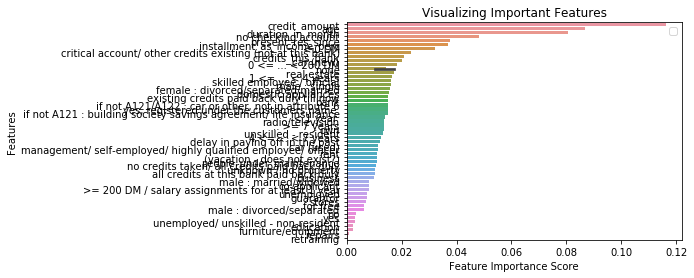

In [0]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [0]:
# Use below values
num_folds = 10
seed = 77
kfold=KFold(10,False,77)

In [0]:
#Validate the Random Forest model build above using k fold

In [0]:
clf_k=RandomForestClassifier(n_estimators=500,criterion='entropy',random_state=9999)
score=cross_val_score(clf_k,credit_df.iloc[:,1:],credit_df.iloc[:,0],cv=kfold)

In [0]:
#Calculate Mean score

In [0]:
score.mean()

0.764

In [0]:
# Calculate score standard deviation using std()

In [0]:
score.std()

0.04903060268852507

# Q8 Print the confusion matrix( 1 Marks)

In [0]:
from sklearn.model_selection import cross_val_predict
y_pred_k=cross_val_predict(clf_k,credit_df.iloc[:,1:],credit_df.iloc[:,0], cv=kfold)

In [0]:
confusion_matrix(credit_df.iloc[:,0],y_pred_k)

array([[644,  56],
       [180, 120]])

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [0]:
print(classification_report(credit_df.iloc[:,0], y_pred_k))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       700
           1       0.68      0.40      0.50       300

    accuracy                           0.76      1000
   macro avg       0.73      0.66      0.67      1000
weighted avg       0.75      0.76      0.74      1000



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

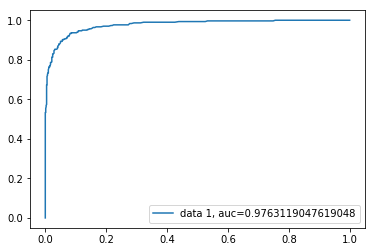

In [0]:
# Compute ROC curve and ROC area for each class
y_pred_proba = clf.predict_proba(credit_df.iloc[:,1:])[::,1]
fpr, tpr, _ = roc_curve(credit_df.iloc[:,0],  y_pred_proba)
auc =roc_auc_score(credit_df.iloc[:,0], y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
